# Posttest KB 6

Import Library yang digunakan


In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense

In [59]:
data = pd.read_csv('motorbike.csv')
data

,price,mileage,power,make_model,date,fuel,gear,offer_type,version,link
0,23990,150,218.0,Honda,03/2020,Gasoline,Manual,Demonstration,CBR1000RR-R Fireblade SP,/offers/honda-others-cbr1000rr-r-fireblade-sp-...
1,18000,700,41.0,Ural Ranger,03/2021,Gasoline,Manual,Used,Euro4 2WD,/offers/ural-ranger-euro4-2wd-gasoline-black-c...
2,10000,80000,125.0,Harley-Davidson Night Rod,09/2010,Gasoline,Manual,Used,Night rod special,/offers/harley-davidson-night-rod-night-rod-sp...
3,12500,18000,82.0,Harley-Davidson Road King,02/1996,Gasoline,Manual,Used,FLHR Road King,/offers/harley-davidson-road-king-flhr-road-ki...
4,10950,10551,185.0,Suzuki,05/2015,Gasoline,Manual,Used,"Sport GSX R 1000, ABS, Complete titanium Yoshi...",/offers/suzuki-others-sport-gsx-r-1000-abs-com...
...,...,...,...,...,...,...,...,...,...,...
6090,16850,38000,64.0,Harley-Davidson,07/2005,Gasoline,Manual,Used,1450 Heritage Softail Bobber Old Style fs2 gsbblo,/offers/harley-davidson-others-1450-heritage-s...
6091,1350,4200,10.0,Daelim Delfino 125,03/2012,Gasoline,Automatic,Used,SU125E SERVICEHEFT GEPFLEGT,/offers/daelim-delfino-125-su125e-serviceheft-...
6092,8990,22800,97.0,Triumph Thruxton,07/2016,Gasoline,Manual,Used,Triumph Thruxton,/offers/triumph-thruxton-triumph-thruxton-gaso...
6093,17300,10592,125.0,BMW R 1200 RT,04/2018,Gasoline,Manual,Used,R 1200RT LC,/offers/bmw-r-1200-rt-r-1200rt-lc-gasoline-bla...


## Preprocessing dataset

Melihat apakah ada data null atau duplikat

Mengubah Nilai Target Dengan Encoding

In [60]:
X = data.drop('price', axis=1) 
y = data['price']

Menerapkan One-Hot Encoding menggunakan get_dummies dari Pandas

In [61]:
X.drop(columns=['date', 'make_model', 'version', 'link'], inplace=True)
try:
    X = pd.get_dummies(X, columns=['fuel', 'gear', 'offer_type'], drop_first=True)
except KeyError as e:
    print("KeyError:", e)
    print("Error Details:", str(e))

Standarisasi

In [62]:
print('Nilai standarisasi sebelum dilakukan scaling: ')
std = X.std(numeric_only=True)
np.std(X)

Nilai standarisasi sebelum dilakukan scaling: 


mileage                      131140.585495
power                           577.330662
fuel_Electric                     0.128277
fuel_Electric/Gasoline            0.022180
fuel_Gasoline                     0.183229
fuel_Others                       0.088393
fuel_Two Stroke Gasoline          0.092844
gear_Manual                       0.394610
gear_Semi-automatic               0.133716
offer_type_Demonstration          0.255520
offer_type_New                    0.148758
offer_type_Pre-registered         0.128893
offer_type_Used                   0.331485
dtype: float64

In [63]:
X

,mileage,power,fuel_Electric,fuel_Electric/Gasoline,fuel_Gasoline,fuel_Others,fuel_Two Stroke Gasoline,gear_Manual,gear_Semi-automatic,offer_type_Demonstration,offer_type_New,offer_type_Pre-registered,offer_type_Used
0,150,218.0,0,0,1,0,0,1,0,1,0,0,0
1,700,41.0,0,0,1,0,0,1,0,0,0,0,1
2,80000,125.0,0,0,1,0,0,1,0,0,0,0,1
3,18000,82.0,0,0,1,0,0,1,0,0,0,0,1
4,10551,185.0,0,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6090,38000,64.0,0,0,1,0,0,1,0,0,0,0,1
6091,4200,10.0,0,0,1,0,0,0,0,0,0,0,1
6092,22800,97.0,0,0,1,0,0,1,0,0,0,0,1
6093,10592,125.0,0,0,1,0,0,1,0,0,0,0,1


In [64]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
x_normalized = scaler.fit_transform(X)

## Split dataset menjadi train dan test

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x_normalized, y, test_size = 0.15, random_state=42)

## Model sequential

In [66]:
model = Sequential([
    Dense(units=16, activation='relu',input_shape=(None,13)),
    Dense(units=32, activation='relu'),
    Dense(units=1, activation='linear')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, None, 16)          224       
                                                                 
 dense_9 (Dense)             (None, None, 32)          544       
                                                                 
 dense_10 (Dense)            (None, None, 1)           33        
                                                                 
Total params: 801 (3.13 KB)
Trainable params: 801 (3.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Model Training

### Model Compile

In [67]:
model.compile(
    optimizer = 'adam',
    loss = 'mae',
    metrics=['mse']
)

### Call Back

Callback untuk menghentikan pelatihan jika tidak ada perbaikan pada validation loss

In [68]:
stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

Callback untuk menyimpan model terbaik berdasarkan validation loss

In [69]:
check = ModelCheckpoint('best_model.h5', save_best_only=True)

### Model Fit

In [70]:
history = model.fit(
    x = x_train,
    y = y_train,
    epochs=1000, #1000x Pembelajaran
    validation_split=0.2,
    callbacks=[stop, check]
)

Epoch 1/1000
130/130 [==============================] - 4s 12ms/step - loss: 258515.6875 - mse: 194346531946496.0000 - val_loss: 12440.6963 - val_mse: 248351472.0000
Epoch 2/1000
  6/130 [>.............................] - ETA: 1s - loss: 4642311.5000 - mse: 4115226404323328.0000

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


130/130 [==============================] - 2s 17ms/step - loss: 258486.6250 - mse: 194346380951552.0000 - val_loss: 12379.0273 - val_mse: 246812512.0000
Epoch 3/1000
130/130 [==============================] - 2s 18ms/step - loss: 258365.5625 - mse: 194346397728768.0000 - val_loss: 12177.3447 - val_mse: 241824960.0000
Epoch 4/1000
130/130 [==============================] - 2s 12ms/step - loss: 258052.5781 - mse: 194346229956608.0000 - val_loss: 11730.6748 - val_mse: 231049296.0000
Epoch 5/1000
130/130 [==============================] - 2s 14ms/step - loss: 257469.4062 - mse: 194345978298368.0000 - val_loss: 10997.9834 - val_mse: 213932848.0000
Epoch 6/1000
130/130 [==============================] - 2s 15ms/step - loss: 256603.6875 - mse: 194345307209728.0000 - val_loss: 9999.3086 - val_mse: 191526992.0000
Epoch 7/1000
130/130 [==============================] - 2s 16ms/step - loss: 255524.0312 - mse: 194344619343872.0000 - val_loss: 8824.9502 - val_mse: 166196928.0000
Epoch 8/1000
130/13

In [74]:
# Load model terbaik
model = keras.models.load_model('best_model.h5')

### Evaluasi Model

In [72]:
test_loss, test_metrics = model.evaluate(x_test, y_test)
print(f'Test MAE: {test_loss:.4f}')
print(f'Test MSE: {test_metrics:.4f}')

29/29 [==============================] - 1s 5ms/step - loss: 8354.3467 - mse: 3295046912.0000
Test MAE: 8354.3467
Test MSE: 3295046912.0000


### Grafik perbandingan antara accuracy dan loss dari train dan test

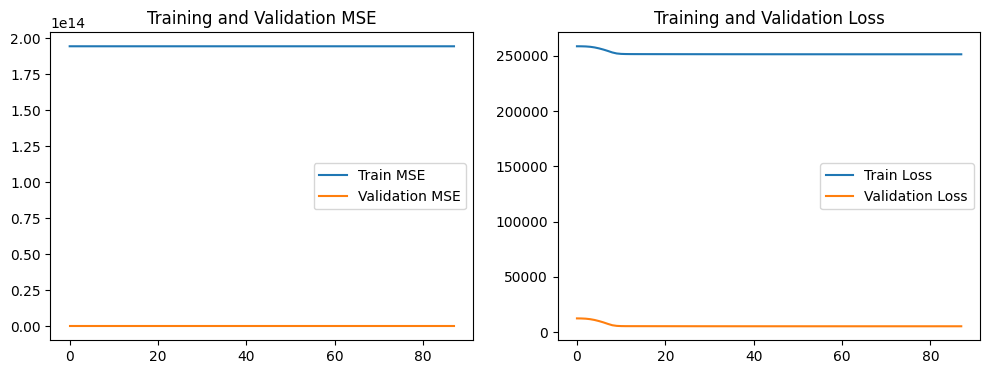

In [73]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['mse'], label='Train MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.legend()
plt.title('Training and Validation MSE')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()